<font size="+3">**Walmart Sales Analysis:**


# **Phase 1**


 <font size="+1">In order to predict and prescribe walmart client for their future sales requirement globally, first we need to analyse and understand their ongoing sales pattern for the current and past years. So to achieve this we follow the below mentioned steps and plot the visualisation of their entire business till date (i.e 2012 to 2015) on the BI dashboard

1.  <font size="+1">Story telling about the Wallmart dataset
2.  <font size="+1">Preprocessing:
      *   <font size="+1">Checking for the presence of required columns
      *   <font size="+1">Checking for Nullvalues  
      *   <font size="+1">Adding order Month as the new column
3.  P<font size="+1">erform the below analysis on the Wallmart data by plotting a graph
      * <font size="+1">What is the total Sales that has happened for each product category globally
      * <font size="+1">Analyse the profit obtained with respect to discounts given for different product category
      * <font size="+1">What is the performance w.r.t Sales in every region
      * <font size="+1">Analyse the sales behavior for the different customer segments
      * <font size="+1">Analyse the global sales trend that is happening between 2012 to 2015 month-wise

<font size="+2">**Assignments:**

1. <font size="+1">Add a new column Quarter in the original walmart dataset and fill the quarter values by extracting from Order Date feature
2. <font size="+1">Display the date on which maximum shipping happened
3. <font size="+1">Display the customers who gave sales more than $4000
4. <font size="+1">list the Top 3 country giving maximum sales and also show the visualization of total sales for each country
5. <font size="+1">Which product category and sub category is giving the minimum sales list and also show through visualization
6. <font size="+1">Which region is giving minimum sales
7. <font size="+1">show the profit visualization only for those product categories that are given on discount
8. <font size="+1">List those product categories and sub categories which are given on discount and not making profit**

<font size="+2">**Dataset Loading and Validation**

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
import matplotlib.pyplot as plt


try:
    df = pd.read_excel('/content/drive/MyDrive/DA_docs/DA_Session Docs/Practice Snippets_Docs/Walmart_Global/Copy of Walmart Global Superstore_Dataset.xlsx')
except Exception as e:
    print(f"Error reading as Excel: {e}")

    try:
        df = pd.read_csv('/content/drive/MyDrive/DA_docs/DA_Session Docs/Practice Snippets_Docs/Walmart_Global/Copy of Walmart Global Superstore_Dataset.xlsx', encoding='latin1')
    except Exception as csv_e:
        print(f"Error reading as CSV with latin1 encoding: {csv_e}")

        try:
            df = pd.read_csv('/content/drive/MyDrive/DA_docs/DA_Session Docs/Practice Snippets_Docs/Walmart_Global/Copy of Walmart Global Superstore_Dataset.xlsx', encoding='ISO-8859-1')
        except Exception as csv_e2:
            print(f"Error reading as CSV with ISO-8859-1 encoding: {csv_e2}")

            raise e

In [90]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [91]:
print('Columns in the dataset:')
print(df.columns)

Columns in the dataset:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [92]:
required_columns = ['Category', 'Sales', 'Profit', 'Order Date']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' is missing from the dataset.")

# **Sales Distribution Across Product Categories**

<font size="+2">**Hypothesis:
Sales contribution is not uniform across product categories; certain categories are expected to generate higher total sales compared to others.**

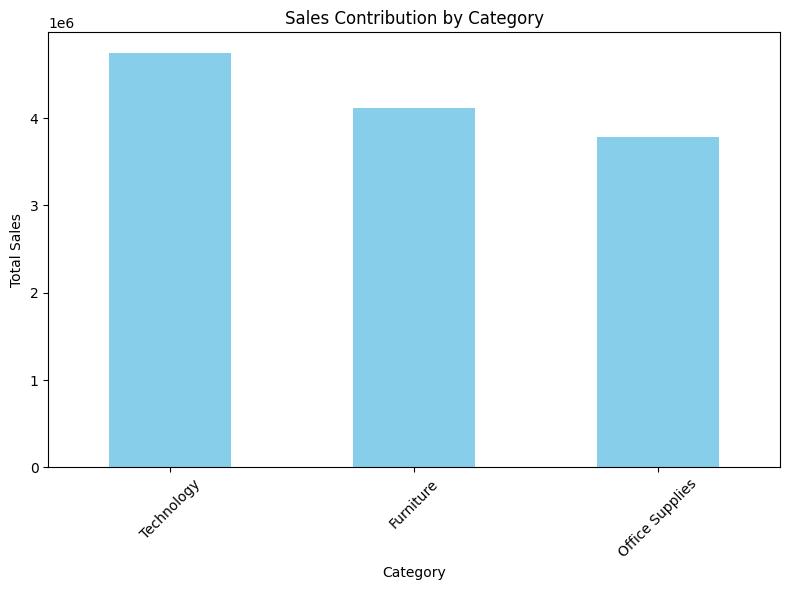

In [93]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Contribution by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Impact of Discounts on Profitability**

<font size="+2">**Hypothesis:
Higher discounts are expected to negatively impact profitability, with profit margins decreasing as discount levels increase across categories.**

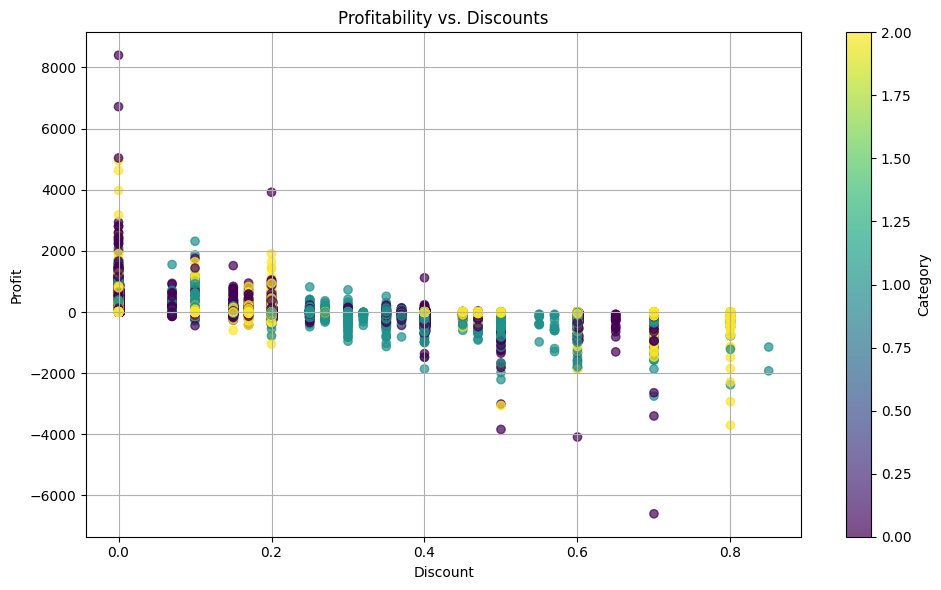

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(data=df, x='Discount', y='Profit', c=pd.factorize(df['Category'])[0], cmap='viridis', alpha=0.7)
plt.title('Profitability vs. Discounts')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.colorbar(label='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Regional Sales Performance Analysis**

<font size="+2">**Hypothesis:
Sales distribution is expected to vary significantly across regions, with certain regions contributing disproportionately higher sales compared to others.**

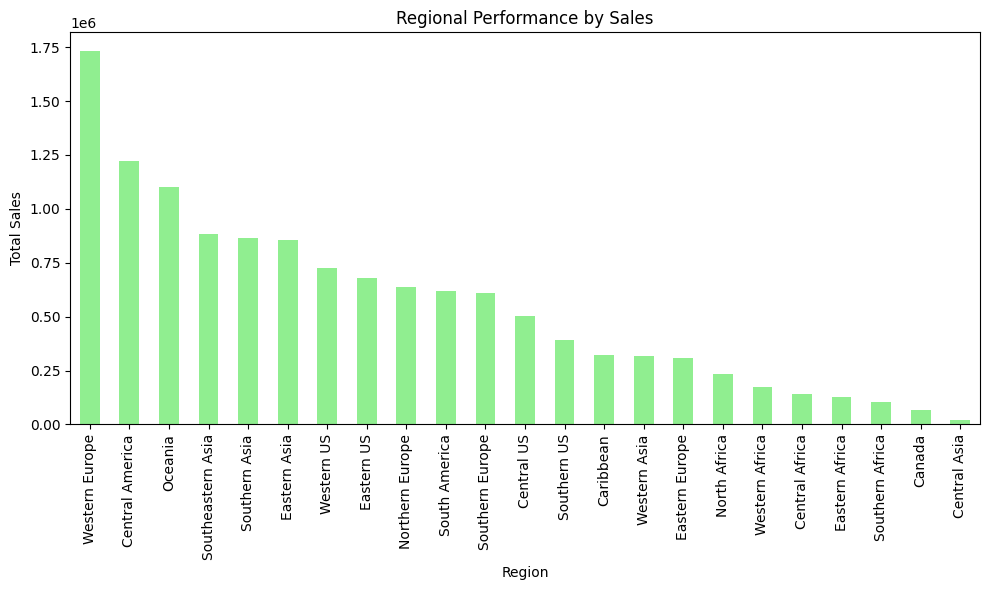

In [95]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='lightgreen')
plt.title('Regional Performance by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Sales Contribution by Customer Segment**

<font size="+2">**Hypothesis:Sales are expected to differ across customer segments, with the Consumer segment likely contributing the highest share compared to Corporate and Home Office segments.**

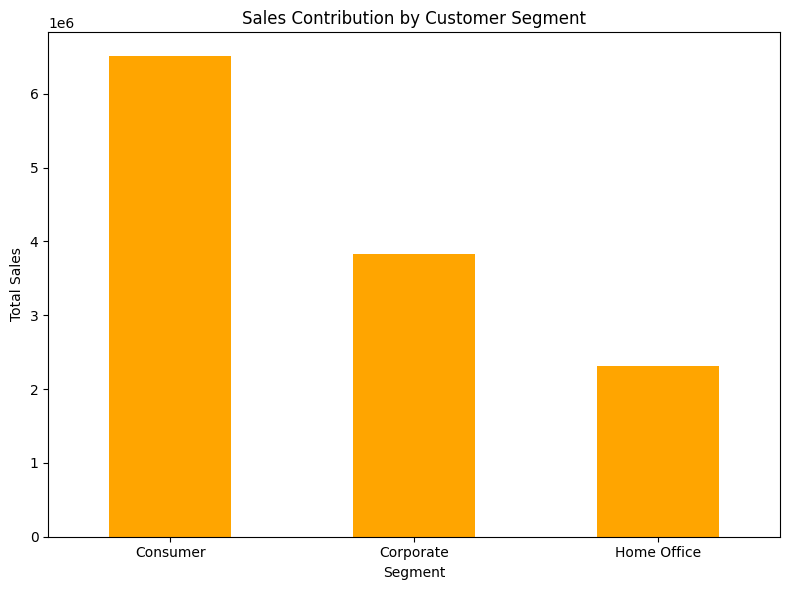

In [96]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
segment_sales.plot(kind='bar', color='orange')
plt.title('Sales Contribution by Customer Segment')
plt.ylabel('Total Sales')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **Trend Analysis of Monthly Sales**

<font size="+2">**Hypothesis:
Monthly sales are expected to show an upward trend over time with seasonal fluctuations, reflecting growth alongside periodic demand variations.**

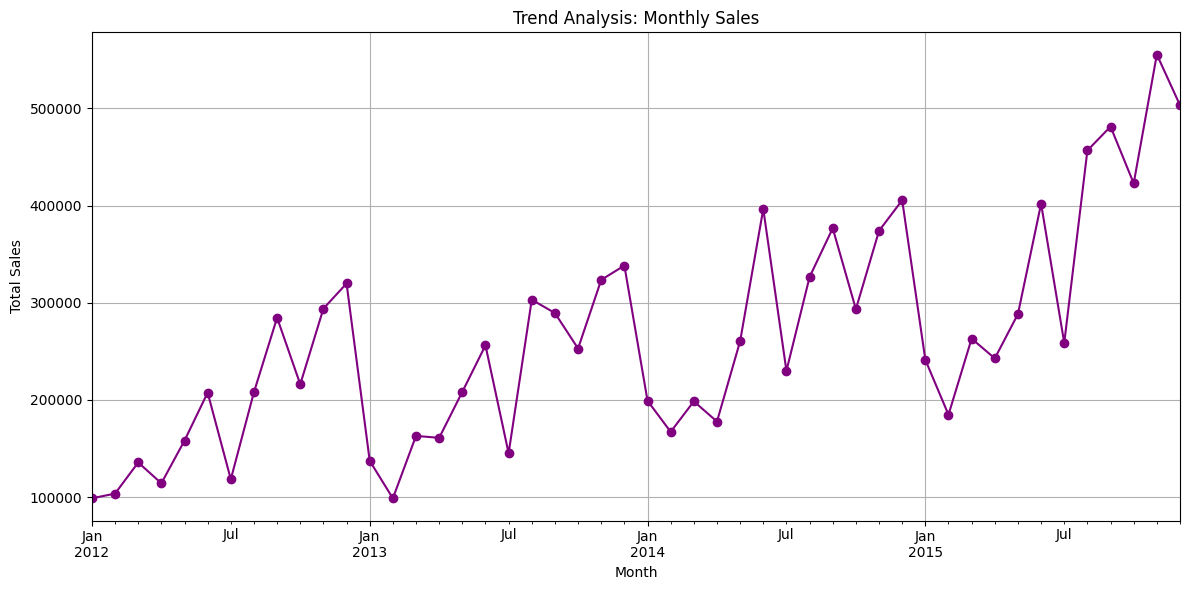

In [110]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='purple', marker='o')
plt.title('Trend Analysis: Monthly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Quarterly Data Preparation**

In [98]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Quarter'] = df['Order Date'].dt.quarter
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Quarter
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High,4
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,1
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,4
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,1
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,4


# **Identification of Peak Shipment Date**


In [104]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
shipment_counts = df.groupby('Ship Date').size()
max_shipment_date = shipment_counts.idxmax()
max_shipment_count = shipment_counts.max()

for date, count in shipment_counts.sort_values(ascending=False).head(10).items():
    bar = "█" * (count // 5)
    peak = " ⬅️ Peak" if date == max_shipment_date else ""
    print(f"{date.date()} | {count:3} | {bar}{peak}")

print(f"\n👉 The maximum shipments occurred on {max_shipment_date.date()} with {max_shipment_count} shipments.")

2015-11-22 | 130 | ██████████████████████████ ⬅️ Peak
2015-09-07 | 115 | ███████████████████████
2015-12-07 | 101 | ████████████████████
2015-11-17 | 101 | ████████████████████
2015-11-29 | 100 | ████████████████████
2015-11-16 |  99 | ███████████████████
2015-12-19 |  95 | ███████████████████
2014-07-01 |  93 | ██████████████████
2015-11-11 |  92 | ██████████████████
2015-12-14 |  92 | ██████████████████

👉 The maximum shipments occurred on 2015-11-22 with 130 shipments.


# **High-Value Customer Sales Analysis**


In [106]:
customer_sales = df.groupby('Customer Name')['Sales'].sum()
customers_over_4k_sales = customer_sales[customer_sales > 4000]

display(customers_over_4k_sales)

,Sales
Customer Name,
Aaron Bergman,24644.62750
Aaron Hawkins,20759.51384
Aaron Smayling,14212.62840
Adam Bellavance,20186.77840
Adam Hart,21718.20142
...,...
Xylona Preis,12198.95060
Yana Sorensen,20032.43800
Yoseph Carroll,20164.37760


# **Top 3 Countries by Total Sales**

<font size="+2">**Hypothesis:
A small set of countries is expected to dominate total sales, with the United States likely leading, followed by Australia and France.**

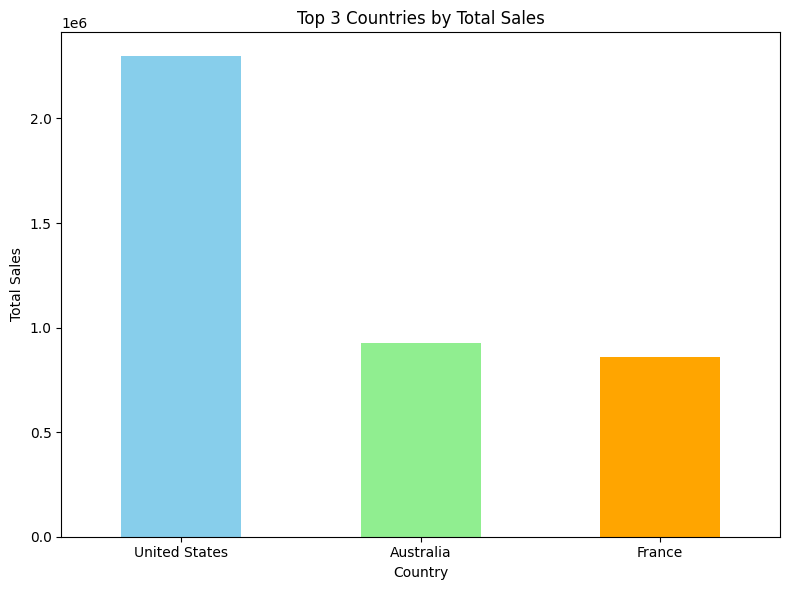

In [100]:
country_sales = df.groupby('Country')['Sales'].sum()
top_3_countries = country_sales.sort_values(ascending=False).head(3)
plt.figure(figsize=(8, 6))
top_3_countries.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange'])
plt.title('Top 3 Countries by Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **Phase 2**

<font size="+1">To predict walmart sales or any other metric for each quarter in future for year 2017 to 2025 using machine learning and deep learning algorithms, we follow the below mentioned steps

1. <font size="+1">Prepare the Dataset:
2. <font size="+1">Load the dataset
3. <font size="+1">Analyse the prediction requirement of the client and check which features are required for prediction process using AI models and select those features from the dataset and if new columns or features has to be generated then perform the Feature engineering process
4. <font size="+1">Feature Engineering - Generate a Quarter column based on the Order Date column
5. <font size="+1">Data Splitting process - Extract relevant features such as year, quarter, and any other useful columns required for prediction
6. <font size="+1">Split the dataset records - only for the selected features i.e quarter and quarterly sales features into training and testing sets required for testing and training the AI models
7. <font size="+1">Train and evaluate the Machine Learning(ML)-algorithms like regression models (e.g., Linear Regression, Random Forest, XGBoost) & Deep Learning(DL) algorithms like Neural Networks
8. <font size="+1">Predict quarter sales for the future i.e for 2017 t0 2025 - Using the machine learning models
9. <font size="+1">Visualize the predictions for the specified quarters through Visualization
10. <font size="+1">Visualize and analyze the trends and predictions for each quarter for the clients requirement
11. <font size="+1">Select the Best fit AI Model in this process using MSE Factor and r2_score factor

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from google.colab import drive

# **Handling and Transforming DateTime Data**

In [109]:
print(data['Order Date'])
data['Order Date'] = pd.to_datetime(data['Order Date'])
print(data['Order Date'])

Order ID
CA-2014-AB10015140-41954   2014-11-11
IN-2014-JR162107-41675     2014-02-05
IN-2014-CR127307-41929     2014-10-17
ES-2014-KM1637548-41667    2014-01-28
SG-2014-RH9495111-41948    2014-11-05
                              ...    
IN-2015-KE1642066-42174    2015-06-19
US-2014-ZD21925140-41765   2014-05-06
CA-2012-ZD21925140-41147   2012-08-26
MX-2013-RB1979518-41322    2013-02-17
MX-2013-MC1810093-41416    2013-05-22
Name: Order Date, Length: 51290, dtype: datetime64[ns]
Order ID
CA-2014-AB10015140-41954   2014-11-11
IN-2014-JR162107-41675     2014-02-05
IN-2014-CR127307-41929     2014-10-17
ES-2014-KM1637548-41667    2014-01-28
SG-2014-RH9495111-41948    2014-11-05
                              ...    
IN-2015-KE1642066-42174    2015-06-19
US-2014-ZD21925140-41765   2014-05-06
CA-2012-ZD21925140-41147   2012-08-26
MX-2013-RB1979518-41322    2013-02-17
MX-2013-MC1810093-41416    2013-05-22
Name: Order Date, Length: 51290, dtype: datetime64[ns]


In [112]:
df = pd.DataFrame({'date_str': ['2023-01-15', '2023-02-28', '2023-03-10']})
print(df)
df['date'] = pd.to_datetime(df['date_str'])
print(df['date'])


     date_str
0  2023-01-15
1  2023-02-28
2  2023-03-10
0   2023-01-15
1   2023-02-28
2   2023-03-10
Name: date, dtype: datetime64[ns]


In [107]:
sr = pd.Series(pd.date_range('2012-12-12 12:12', periods=5, freq='H'))
idx = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5']
sr.Index = idx
print(sr)


0   2012-12-12 12:12:00
1   2012-12-12 13:12:00
2   2012-12-12 14:12:00
3   2012-12-12 15:12:00
4   2012-12-12 16:12:00
dtype: datetime64[ns]


/tmp/ipython-input-2926806250.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sr = pd.Series(pd.date_range('2012-12-12 12:12', periods=5, freq='H'))


# **Year and Month Extraction from Order Dates**

In [113]:
data['Year'] = data['Order Date'].dt.year
print(data['Year'])
print(data)
data['Quarter'] = data['Order Date'].dt.to_period('M')
print(data['Quarter'])
print(data)


Order ID
CA-2014-AB10015140-41954    2014
IN-2014-JR162107-41675      2014
IN-2014-CR127307-41929      2014
ES-2014-KM1637548-41667     2014
SG-2014-RH9495111-41948     2014
                            ... 
IN-2015-KE1642066-42174     2015
US-2014-ZD21925140-41765    2014
CA-2012-ZD21925140-41147    2012
MX-2013-RB1979518-41322     2013
MX-2013-MC1810093-41416     2013
Name: Year, Length: 51290, dtype: int32
                          Row ID Order Date  Ship Date       Ship Mode  \
Order ID                                                                 
CA-2014-AB10015140-41954   40098 2014-11-11 2014-11-13     First Class   
IN-2014-JR162107-41675     26341 2014-02-05 2014-02-07    Second Class   
IN-2014-CR127307-41929     25330 2014-10-17 2014-10-18     First Class   
ES-2014-KM1637548-41667    13524 2014-01-28 2014-01-30     First Class   
SG-2014-RH9495111-41948    47221 2014-11-05 2014-11-06        Same Day   
...                          ...        ...        ...             ...

# **Quarterly Sales Aggregation**

In [114]:
quarterly_data = data.groupby('Quarter').agg({'Sales': 'sum'}).reset_index()
print(quarterly_data)
print(quarterly_data['Quarter'], quarterly_data['Sales'])

quarterly_data = quarterly_data.reset_index()

quarterly_data['Quarter'] = quarterly_data['Quarter'].astype(str)
print(quarterly_data['Quarter'])

    Quarter         Sales
0   2012-01   98898.48886
1   2012-02  103717.92328
2   2012-03  135746.40206
3   2012-04  114332.96318
4   2012-05  158228.32880
5   2012-06  207571.54352
6   2012-07  118434.88462
7   2012-08  208063.28372
8   2012-09  284587.74846
9   2012-10  216114.56748
10  2012-11  293947.35216
11  2012-12  319807.40940
12  2013-01  137435.97514
13  2013-02   98854.96208
14  2013-03  163076.77116
15  2013-04  161052.26952
16  2013-05  208364.89124
17  2013-06  256175.69842
18  2013-07  145236.78512
19  2013-08  303142.94238
20  2013-09  289389.16564
21  2013-10  252939.85020
22  2013-11  323512.41690
23  2013-12  338256.96660
24  2014-01  199185.90738
25  2014-02  167239.65040
26  2014-03  198594.03012
27  2014-04  177821.31684
28  2014-05  260498.56470
29  2014-06  396519.61190
30  2014-07  229928.95200
31  2014-08  326488.78936
32  2014-09  376619.24568
33  2014-10  293406.64288
34  2014-11  373989.36010
35  2014-12  405454.37802
36  2015-01  241268.55566
37  2015-02 

# **Quarter Conversion and Numeric Indexing**

In [115]:
def convert_quarter(q):
    if 'Q' not in q:
        return None
    year, qtr = q.split('Q')
    year = int(year)
    qtr = int(qtr)
    return year * 10 + qtr
quarterly_data['Quarter_Num'] = range(1, len(quarterly_data) + 1)
print(quarterly_data[['Quarter', 'Quarter_Num']].head())


   Quarter  Quarter_Num
0  2012-01            1
1  2012-02            2
2  2012-03            3
3  2012-04            4
4  2012-05            5


# **Model Training and Performance Evaluation**

In [116]:
X = quarterly_data[['Quarter_Num']]
y = quarterly_data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2, predictions

<font size="+2">**Linear Regressiont**

In [117]:
lr_model = LinearRegression()
lr_mse, lr_r2, lr_predictions = evaluate_model(lr_model, X_train, y_train, X_test, y_test)


<font size="+2">**RandomForest Regressor**

In [118]:
rf_model = RandomForestRegressor(random_state=42)
rf_mse, rf_r2, rf_predictions = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

<font size="+2">**XGB Regressor**

In [119]:
xgb_model = XGBRegressor(random_state=42)
xgb_mse, xgb_r2, xgb_predictions = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

<font size="+2">**Deep Learning Model**

In [120]:
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=1),
    Dense(64, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train, y_train, epochs=100, verbose=0)
nn_predictions = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<font size="+2">**Future Predictions**

In [121]:
future_quarters = pd.DataFrame({'Quarter_Num': [year * 10 + qtr for year in range(2017, 2025) for qtr in range(1, 4)]})
future_predictions_lr = lr_model.predict(future_quarters)
future_predictions_rf = rf_model.predict(future_quarters)
future_predictions_xgb = xgb_model.predict(future_quarters)
future_predictions_nn = nn_model.predict(future_quarters)
print(quarterly_data)
print(future_quarters)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
    index  Quarter         Sales  Quarter_Num
0       0  2012-01   98898.48886            1
1       1  2012-02  103717.92328            2
2       2  2012-03  135746.40206            3
3       3  2012-04  114332.96318            4
4       4  2012-05  158228.32880            5
5       5  2012-06  207571.54352            6
6       6  2012-07  118434.88462            7
7       7  2012-08  208063.28372            8
8       8  2012-09  284587.74846            9
9       9  2012-10  216114.56748           10
10     10  2012-11  293947.35216           11
11     11  2012-12  319807.40940           12
12     12  2013-01  137435.97514           13
13     13  2013-02   98854.96208           14
14     14  2013-03  163076.77116           15
15     15  2013-04  161052.26952           16
16     16  2013-05  208364.89124           17
17     17  2013-06  256175.69842           18
18     18  2013-07  145236.78512           19
19     19  2013-08  303142.94238          

# **Comparison of Actual Sales and Model Forecasts**

<font size="+2">**Quarterly Trend Analysis of Actual Sales**

<font size="+2">**Hypothesis: Sales exhibit consistent quarter-over-quarter growth with seasonal fluctuations, suggesting that predictive models can capture both trend and seasonality for accurate forecasting.**

In [134]:
def format_quarter(num):
    year = num // 10
    qtr = num % 10
    return f"{year}-Q{qtr}"
quarterly_data['Quarter_Label'] = quarterly_data['Quarter'].astype(str)
future_quarters['Quarter_Label'] = future_quarters['Quarter_Num'].apply(format_quarter)

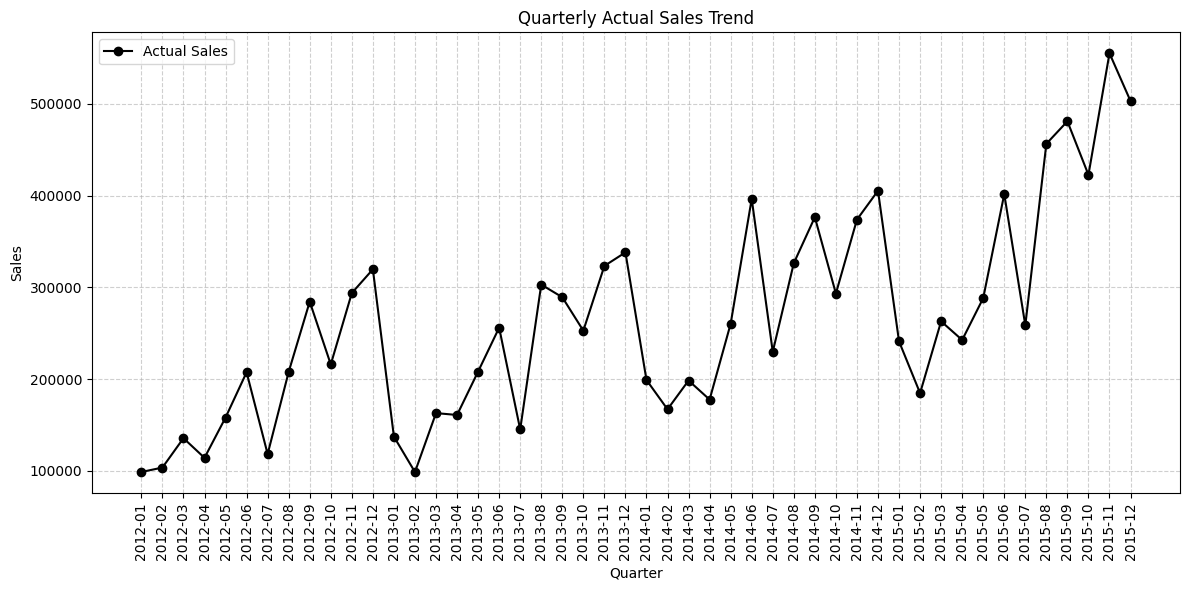

In [126]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data['Quarter_Label'], quarterly_data['Sales'],
         marker='o', color='black', label="Actual Sales")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("Quarterly Actual Sales Trend")
plt.xticks(rotation=90)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


<font size="+2">**Quarterly Sales Forecast Using Linear Regression**

<font size="+2">**Hypothesis:Linear Regression provides a simplified trend-based approach to estimate future quarterly sales, assuming consistent linear growth patterns.**

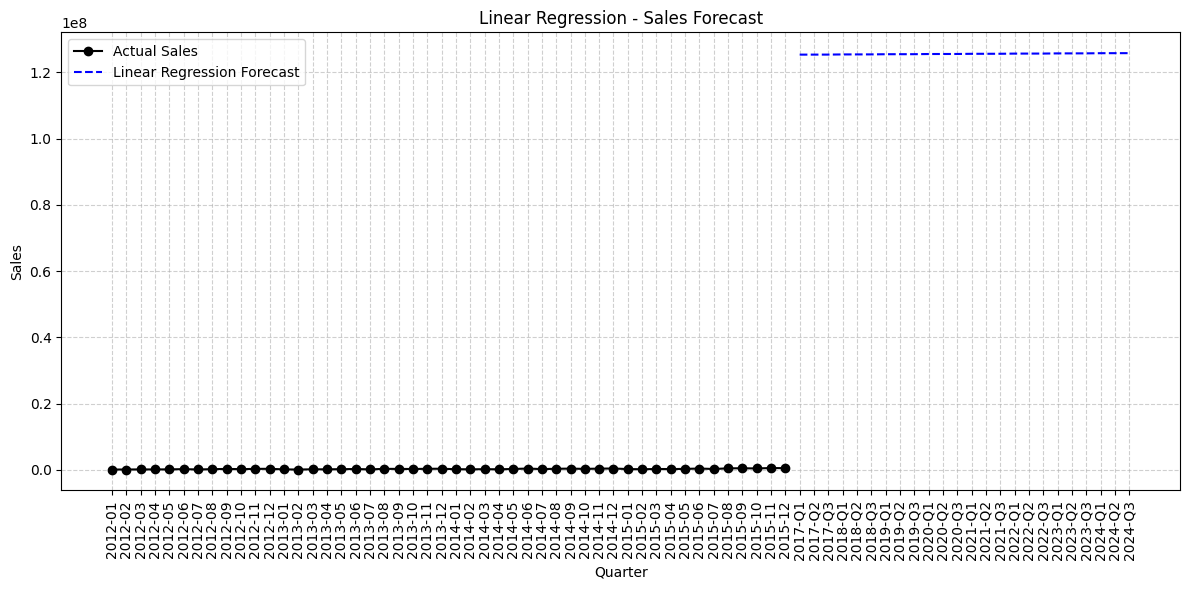

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data['Quarter_Label'], y, marker='o', color='black', label="Actual Sales")
plt.plot(future_quarters['Quarter_Label'], future_predictions_lr, '--', color='blue', label="Linear Regression Forecast")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("Linear Regression - Sales Forecast")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<font size="+2">**Quarterly Sales Forecast Using Random Forest**

<font size="+2">**Hypothesis: Random Forest captures complex patterns and variability in quarterly sales, providing a robust forecast by averaging multiple decision paths.**


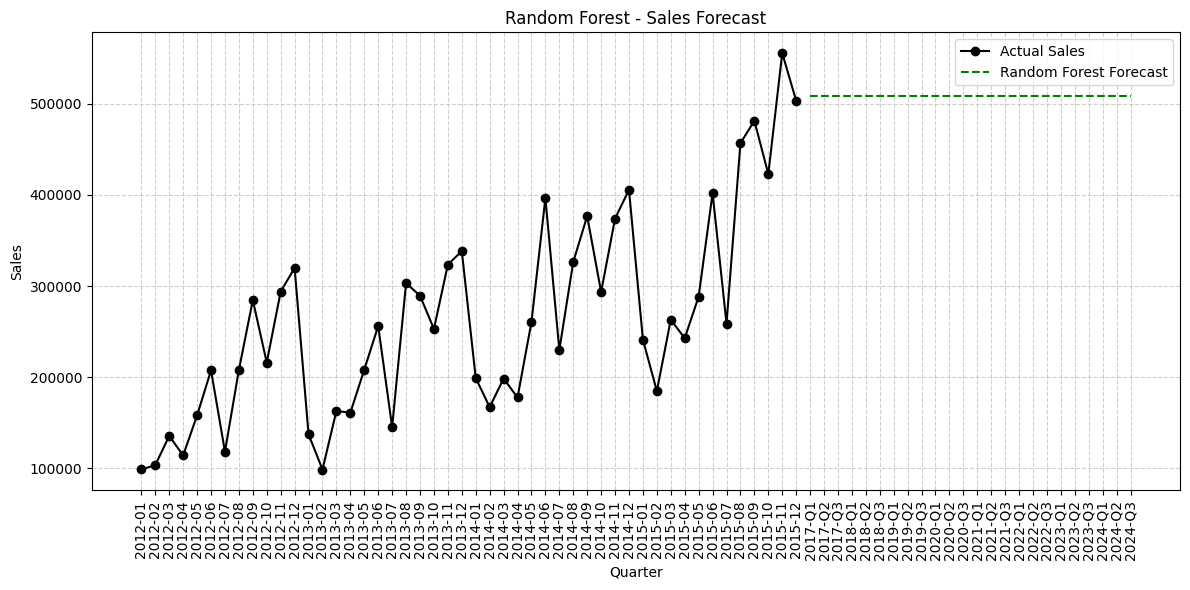

In [135]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data['Quarter_Label'], y, marker='o', color='black', label="Actual Sales")
plt.plot(future_quarters['Quarter_Label'], future_predictions_rf, '--', color='green', label="Random Forest Forecast")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("Random Forest - Sales Forecast")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<font size="+2">**Quarterly Sales Forecast Using XGBoost**

<font size="+2">**Hypothesis: XGBoost leverages gradient boosting and historical sales patterns to deliver accurate quarterly forecasts, effectively balancing trend and variability.**


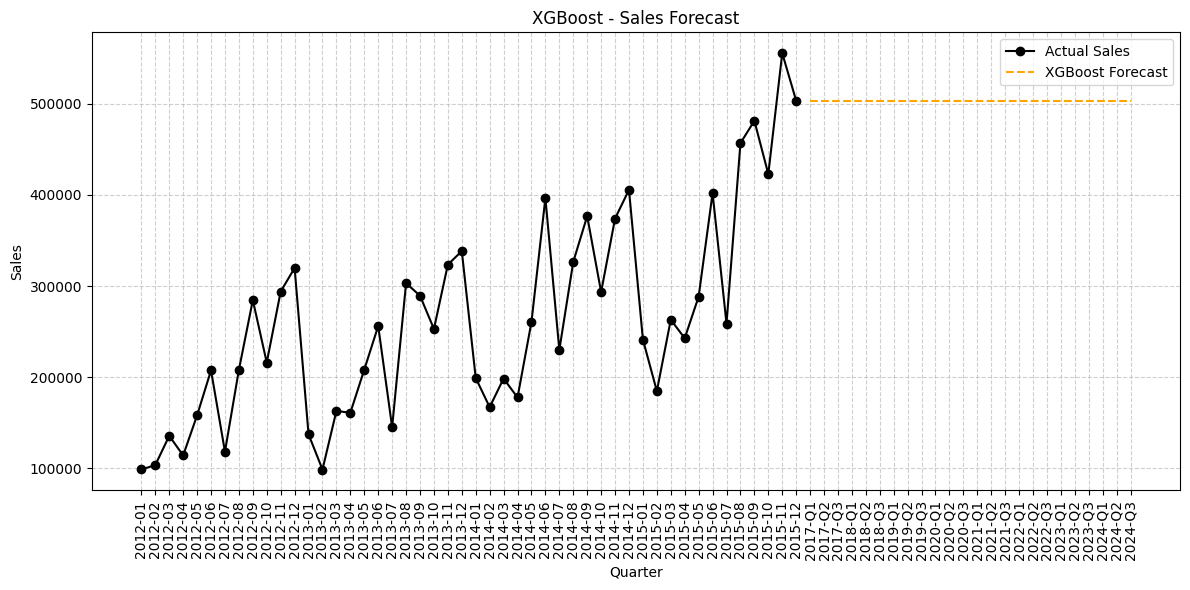

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data['Quarter_Label'], y, marker='o', color='black', label="Actual Sales")
plt.plot(future_quarters['Quarter_Label'], future_predictions_xgb, '--', color='orange', label="XGBoost Forecast")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("XGBoost - Sales Forecast")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<font size="+2">**Quarterly Sales Forecast Using Neural Network**

<font size="+2">**Hypothesis: Neural Networks capture complex, non-linear sales patterns, enabling more adaptive and data-driven quarterly forecasts compared to simpler models.**


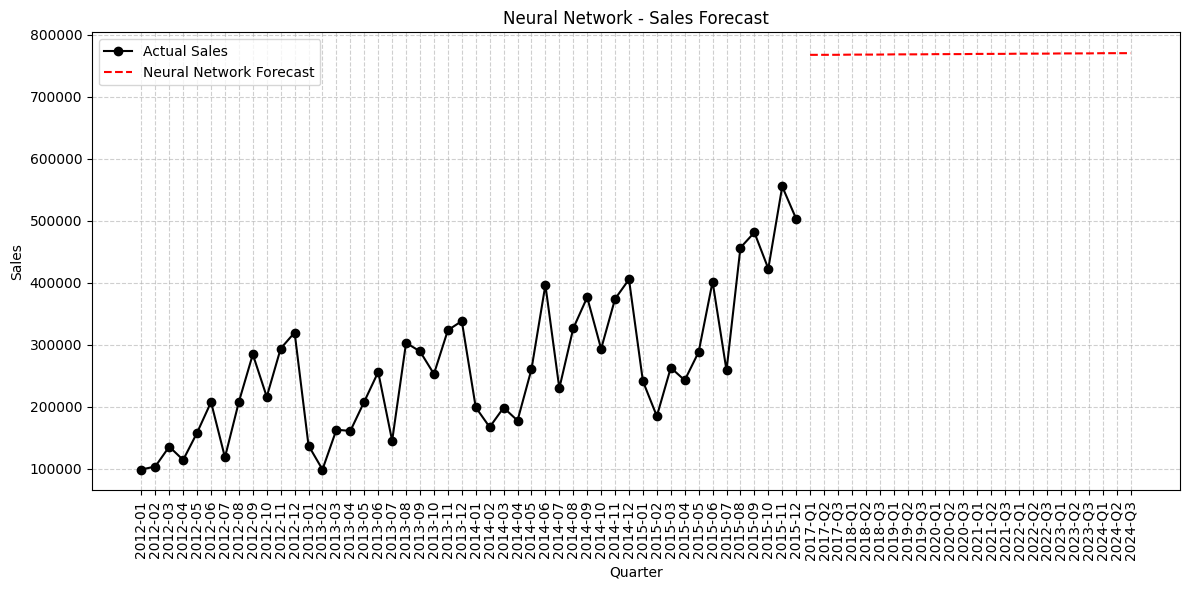

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data['Quarter_Label'], y, marker='o', color='black', label="Actual Sales")
plt.plot(future_quarters['Quarter_Label'], future_predictions_nn, '--', color='red', label="Neural Network Forecast")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("Neural Network - Sales Forecast")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [138]:
print("Linear Regression - MSE:", lr_mse, ", R2:", lr_r2)
print("Random Forest - MSE:", rf_mse, ", R2:", rf_r2)
print("XGBoost - MSE:", xgb_mse, ", R2:", xgb_r2)
print("Neural Network - MSE:", nn_mse, ", R2:", nn_r2)

Linear Regression - MSE: 9382368971.929638 , R2: -0.11175733430674817
Random Forest - MSE: 11043274967.988873 , R2: -0.3085652437203916
XGBoost - MSE: 19784527406.343548 , R2: -1.3443539169693888
Neural Network - MSE: 59513359763.749146 , R2: -6.051994480768798


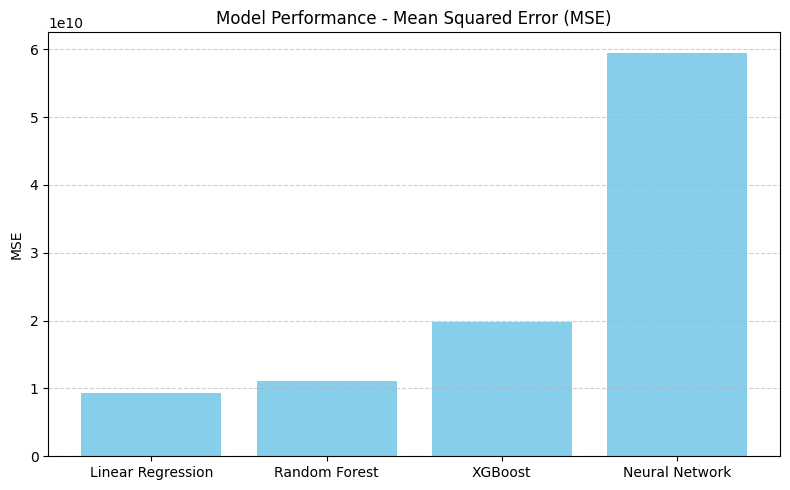

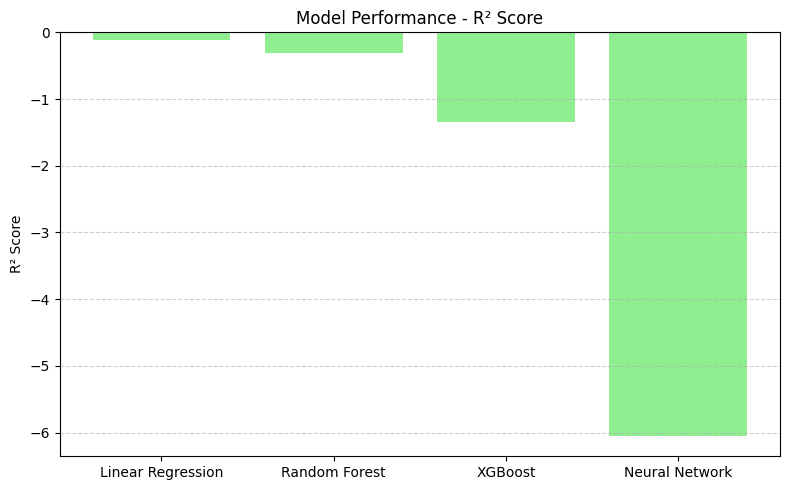

In [143]:
models = ["Linear Regression", "Random Forest", "XGBoost", "Neural Network"]

mse_values = [lr_mse, rf_mse, xgb_mse, nn_mse]
r2_values = [lr_r2, rf_r2, xgb_r2, nn_r2]

x = np.arange(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x, mse_values, color="skyblue")
plt.xticks(x, models, rotation=0)
plt.ylabel("MSE")
plt.title("Model Performance - Mean Squared Error (MSE)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(x, r2_values, color="lightgreen")
plt.xticks(x, models, rotation=0)
plt.ylabel("R² Score")
plt.title("Model Performance - R² Score")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<font size="+3" color='orangered'><b> Prediction:

<font size="+3"><b>Among the models evaluated, Linear Regression demonstrated the best performance, achieving the lowest Mean Squared Error (MSE) and the least negative R² value, indicating it provides the most reliable fit for the data. Random Forest ranked second, but its performance was less stable. XGBoost showed higher error rates with a negative R², reflecting a weak predictive capability. Neural Network performed the worst, with the highest MSE and a strongly negative R², suggesting it failed to capture meaningful patterns in the dataset.